# Librerias

In [34]:
import pandas as pd



# Importamos el dataset

In [35]:
# Importamos el dataset
df = pd.read_csv("../data/hypertension_dataset.csv")

# Revisar las primeras filas
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


# Exploramos los datos

In [36]:
# Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [37]:
# Estadisticas descriptivas
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


# Limpieza de Datos

In [38]:
# Verificar si hay valores nulos
df.isnull().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [39]:
# Eliminamos columnas innecesarias
df.drop('Country', axis=1, inplace=True)

# Preparacion y entrenamiento del modelo

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [41]:
# Seleccion de la variabel objetivo
target = "Hypertension"


In [42]:
# Separa características (X) y objetivo (y)
X = df.drop(columns=[target])
y = df[target]

In [43]:
# Codifica la variable objetivo
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

In [44]:
# Detecta automáticamente columnas categóricas y numéricas
cat_feats = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_feats = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [45]:
# Visualiza las características categóricas y numéricas
print("Categorical Features:", cat_feats)
print("Numerical Features:", num_feats)

Categorical Features: ['Smoking_Status', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Gender', 'Education_Level', 'Employment_Status']
Numerical Features: ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']


In [46]:
# Define el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OrdinalEncoder(), cat_feats)
    ]
)

In [47]:
# Construimos el pipeline con el preprocesamiento y modelo

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2,random_state=42,class_weight='balanced'))
])

In [48]:
# Divide para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)


In [49]:
# Entrena el modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI', 'Cholesterol',
                                                   'Systolic_BP',
                                                   'Diastolic_BP',
                                                   'Alcohol_Intake',
                                                   'Stress_Level',
                                                   'Salt_Intake',
                                                   'Sleep_Duration',
                                                   'Heart_Rate', 'LDL', 'HDL',
                                                   'Triglycerides',
                                                   'Glucose']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Smoking_Status',
                                                   'Physical_Activity_Level',
                                                   'Family_History', 'Diabetes',
                                                   'Gender', 'Education_Level',
                                                   'Employment_Status'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [50]:
import json
# Predicciones
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()  # para JSON debe ser lista
}

with open("model_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Métricas completas exportadas a model_metrics.json")

Métricas completas exportadas a model_metrics.json


c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Visualizacion de los Datos

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


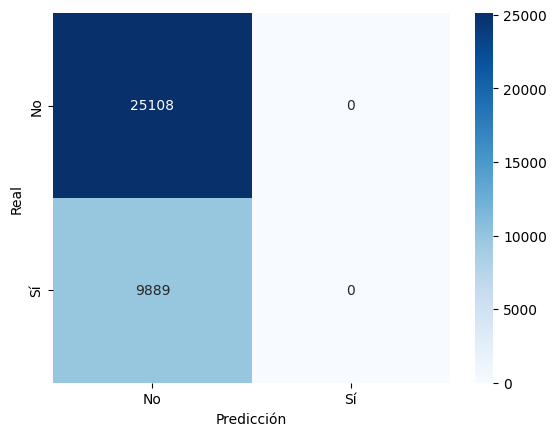

In [52]:
#MATRIZ DE CONFUSION
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


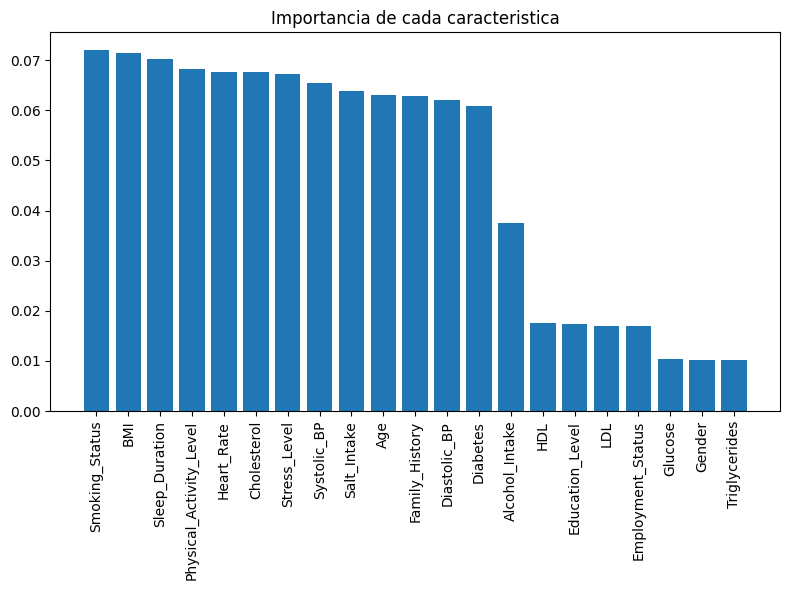

In [54]:
# Visualizacion de las caracteristicas mas importantes
importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title('Importancia de cada caracteristica')
plt.tight_layout()
plt.show()



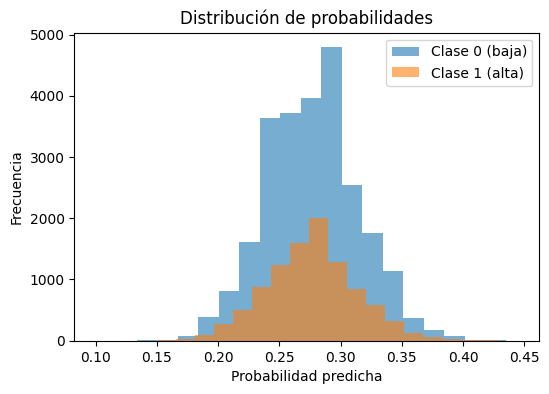

In [55]:
# Visualizacion de la distribucion de las probabilidades
plt.figure(figsize=(6,4))
plt.hist(y_proba[y_test==0], bins=20, alpha=0.6, label='Clase 0 (baja)')
plt.hist(y_proba[y_test==1], bins=20, alpha=0.6, label='Clase 1 (alta)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de probabilidades')
plt.legend()
plt.show()


# Guardamos el modelo y las metricas

In [57]:
import joblib
joblib.dump(pipeline, '../models/modelos.pkl')


['../models/modelos.pkl']

In [61]:
modelo = joblib.load("../models/modelos.pkl")
ordinal_encoder = modelo.named_steps["preprocessor"].named_transformers_["cat"]

# 3. Obtén los valores válidos de cada columna categórica
categorical_cols = modelo.named_steps["preprocessor"].transformers_[1][2]
categorical_allowed_values = {
    col: list(ordinal_encoder.categories_[i])
    for i, col in enumerate(categorical_cols)
}
# Exporta los valores válidos a un archivo JSON
with open("../models/categorical_allowed_values.json", "w") as f:
    json.dump(categorical_allowed_values, f, indent=4)